In [ ]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=db7640a0ea3983fd8e36b3534c664ec3c30bb3c221782894a69c401fc7f146a2
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Suc

In [ ]:
import json
import re
from googletrans import Translator

# Initialize Google Translator
translator = Translator()

# Function to preprocess each tweet
def preprocess_tweet(tweet_text):
    if not tweet_text:
        return ""

    # Convert to lowercase
    tweet_text = tweet_text.lower()

    # Remove URLs
    tweet_text = re.sub(r"http\S+|www\S+|https\S+", "", tweet_text, flags=re.MULTILINE)

    # Remove mentions and hashtags
    tweet_text = re.sub(r"@\w+|#\w+", "", tweet_text)

    # Remove special characters but keep Marathi/English script
    tweet_text = re.sub(r"[^\w\s\u0900-\u097F]", " ", tweet_text)

    # Add space after removing dots (e.g., "word.word" -> "word word")
    tweet_text = re.sub(r"(\.\s*|\.\.\.*)", " ", tweet_text)

    # Normalize spaces
    tweet_text = re.sub(r"\s+", " ", tweet_text).strip()

    return tweet_text

# Function to translate Marathi tweets to English
def translate_tweet(tweet_text):
    try:
        translated_text = translator.translate(tweet_text, src="mr", dest="en").text
        return translated_text
    except Exception as e:
        print(f"Translation Error: {e}")
        return "Translation failed"

# Main function to process the dataset
def preprocess_dataset(input_file, output_file):
    try:
        with open(input_file, 'r', encoding='utf-8') as infile:
            data = json.load(infile)

        processed_data = {}
        for i, tweet in enumerate(data, 1):
            tweet_text = tweet.get("text", "")
            cleaned_text = preprocess_tweet(tweet_text)
            translated_text = translate_tweet(cleaned_text)
            processed_data[f"Tweet_{i}"] = translated_text  # Numbered output

        with open(output_file, 'w', encoding='utf-8') as outfile:
            json.dump(processed_data, outfile, ensure_ascii=False, indent=4)

        print(f"Processed and translated dataset saved to {output_file}")
    except Exception as e:
        print(f"Error: {e}")

# File paths
input_file = "/content/tweets_ब्राह्मण_mr_20241108_011246.json"  # Replace with your actual file path
output_file = "tweets_marathi_translated.json"

# Preprocess the dataset
preprocess_dataset(input_file, output_file)


Error: [Errno 2] No such file or directory: '/content/tweets_ब्राह्मण_mr_20241108_011246.json'


In [ ]:
!pip install pandas matplotlib wordcloud nltk


In [ ]:
!sudo apt-get install fonts-dejavu-core

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-dejavu-core
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,041 kB of archives.
After this operation, 3,025 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-core all 2.37-2build1 [1,041 kB]
Fetched 1,041 kB in 2s (629 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-dejavu-core.
(Reading database ... 123

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


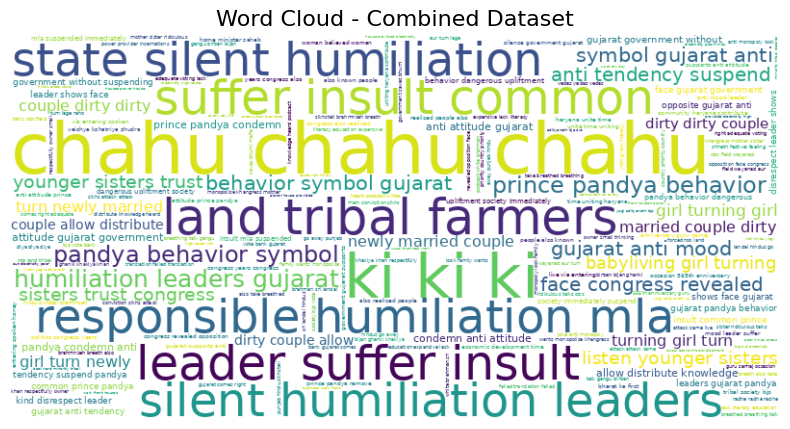

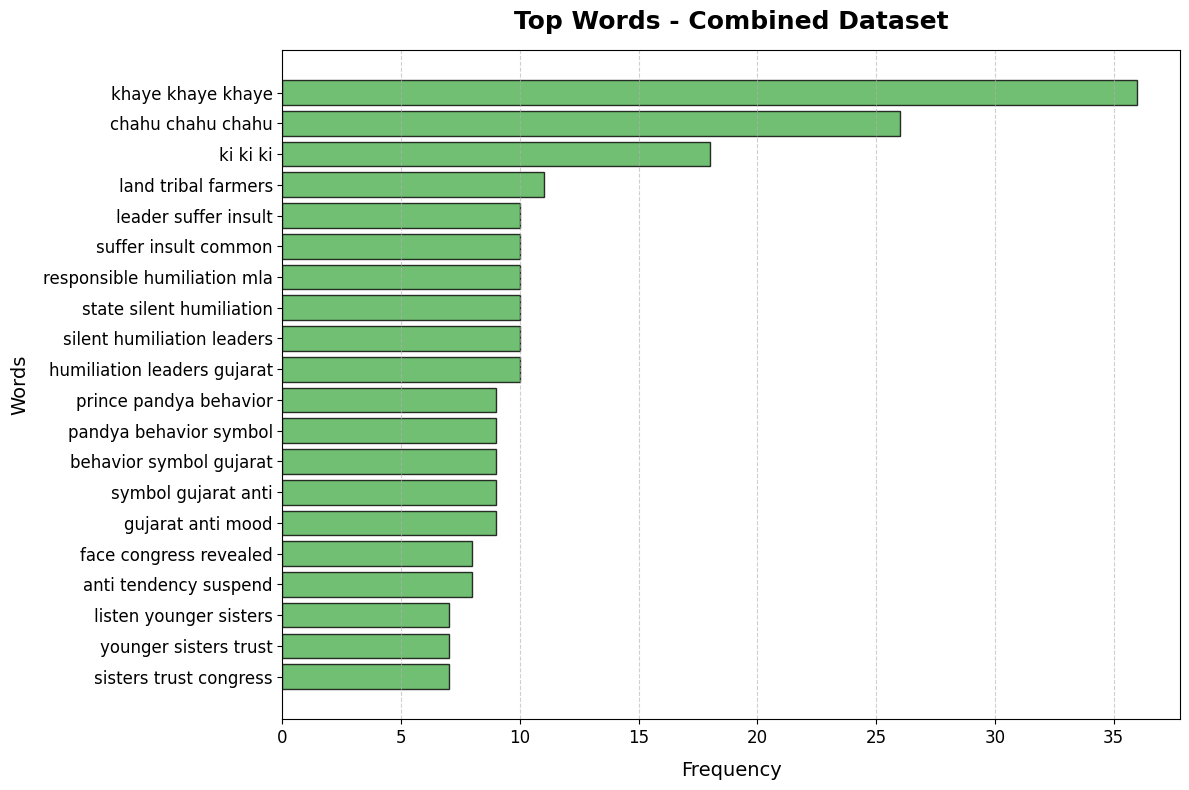

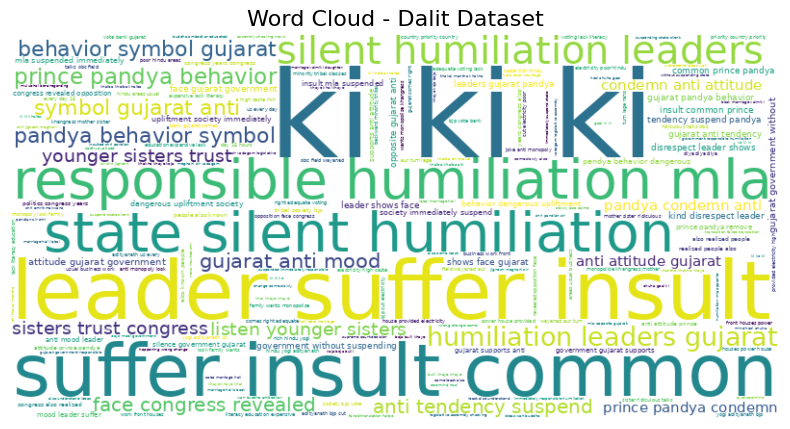

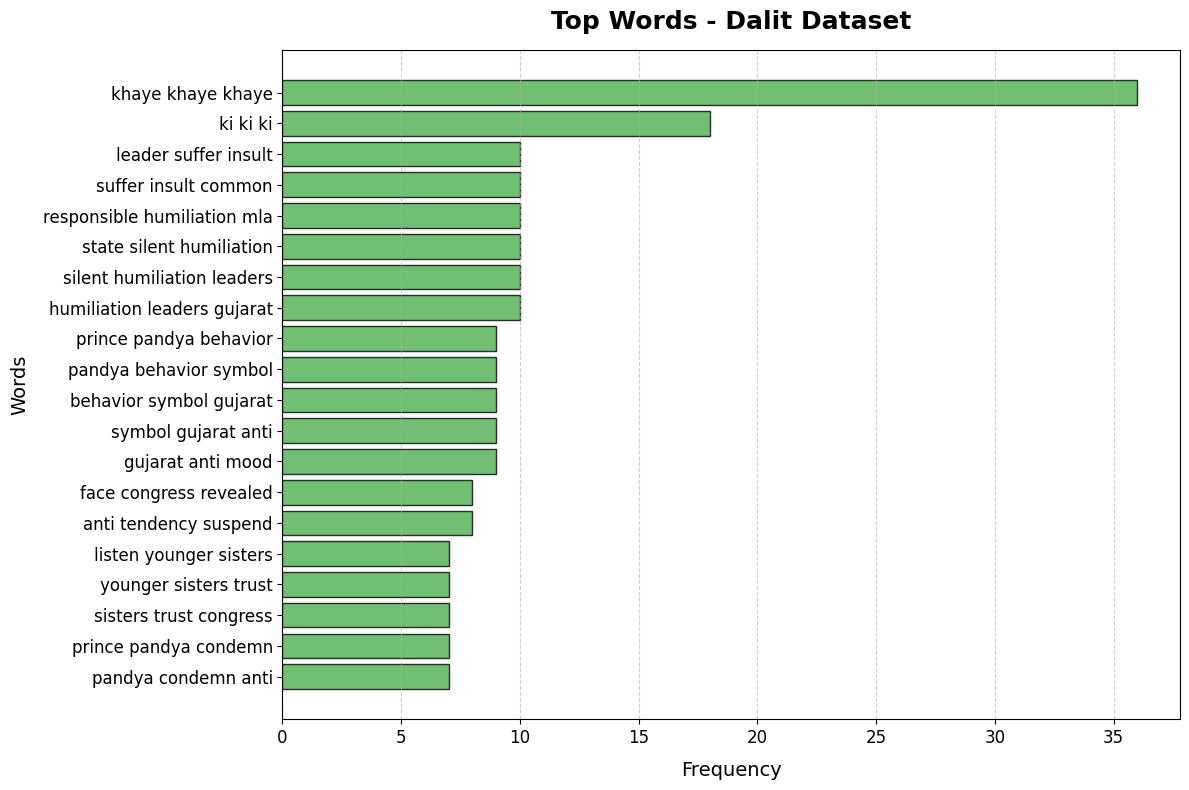

                             Words  Frequency
0            (khaye, khaye, khaye)         36
1                     (ki, ki, ki)         18
2         (leader, suffer, insult)         10
3         (suffer, insult, common)         10
4  (responsible, humiliation, mla)         10
Words        object
Frequency     int64
dtype: object


<ipython-input-15-6a3b30432584>:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y="Words", x="Frequency", palette="viridis", edgecolor="black")


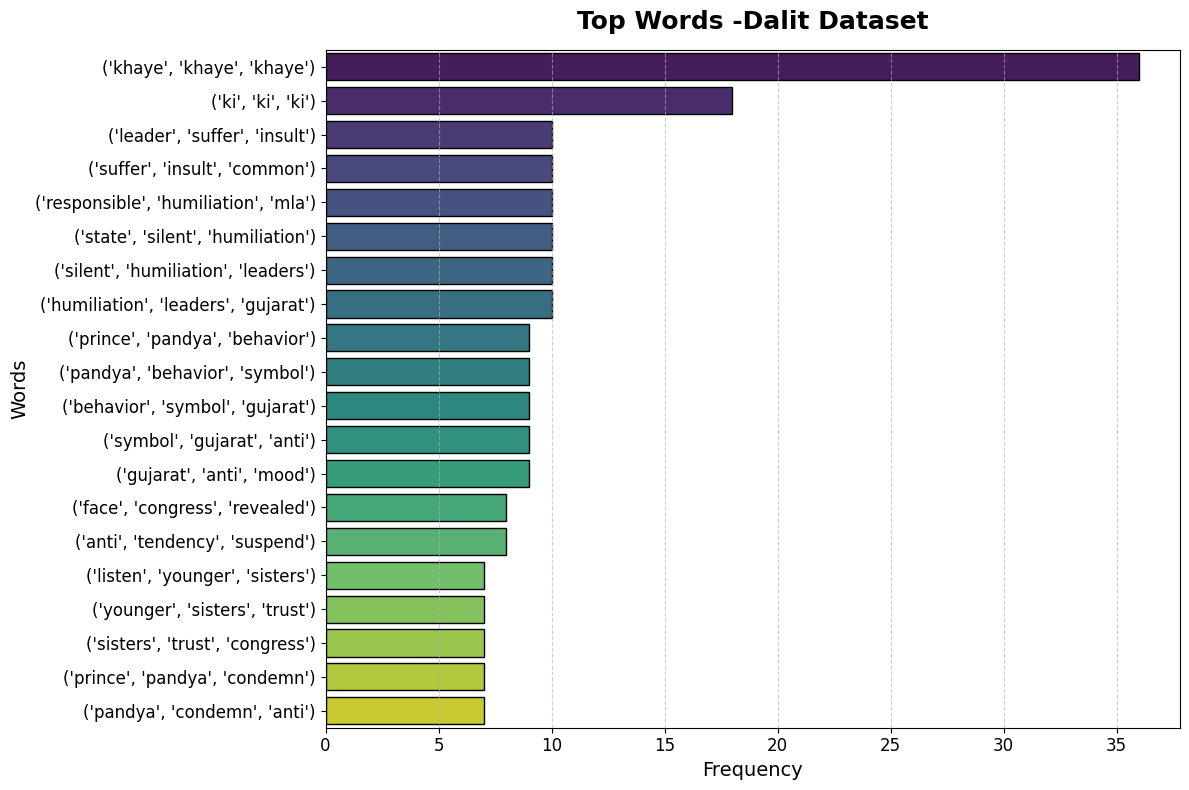

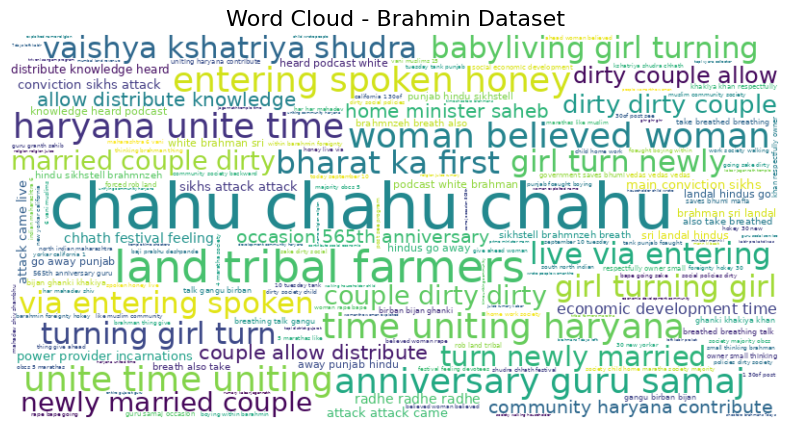

<ipython-input-15-6a3b30432584>:128: UserWarning:

Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.

<ipython-input-15-6a3b30432584>:128: UserWarning:

Matplotlib currently does not support Tamil natively.

<ipython-input-15-6a3b30432584>:129: UserWarning:

Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.

<ipython-input-15-6a3b30432584>:129: UserWarning:

Matplotlib currently does not support Tamil natively.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Matplotlib currently does not support Tamil natively.



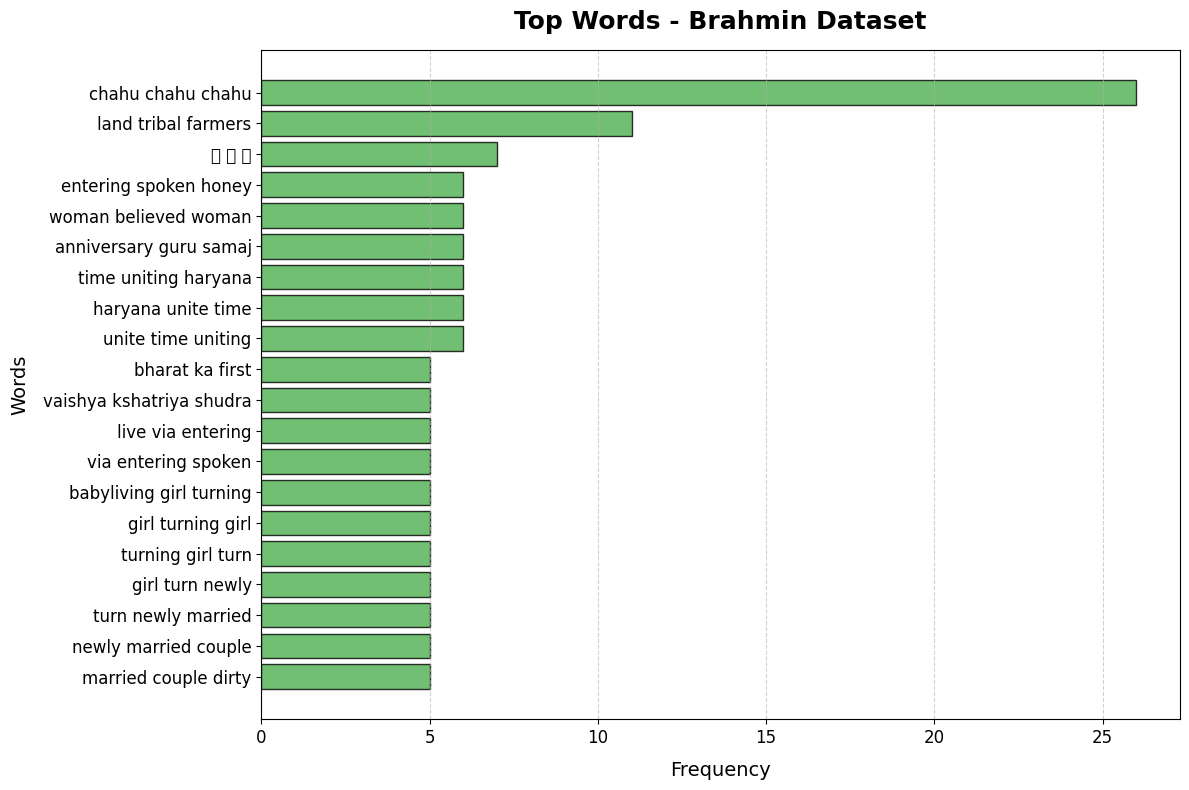

<ipython-input-15-6a3b30432584>:144: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




                       Words  Frequency
0      (chahu, chahu, chahu)         26
1    (land, tribal, farmers)         11
2                  (த, த, த)          7
3  (entering, spoken, honey)          6
4   (woman, believed, woman)          6
Words        object
Frequency     int64
dtype: object


<ipython-input-15-6a3b30432584>:151: UserWarning:

Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.

<ipython-input-15-6a3b30432584>:151: UserWarning:

Matplotlib currently does not support Tamil natively.

<ipython-input-15-6a3b30432584>:152: UserWarning:

Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.

<ipython-input-15-6a3b30432584>:152: UserWarning:

Matplotlib currently does not support Tamil natively.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Matplotlib currently does not support Tamil natively.



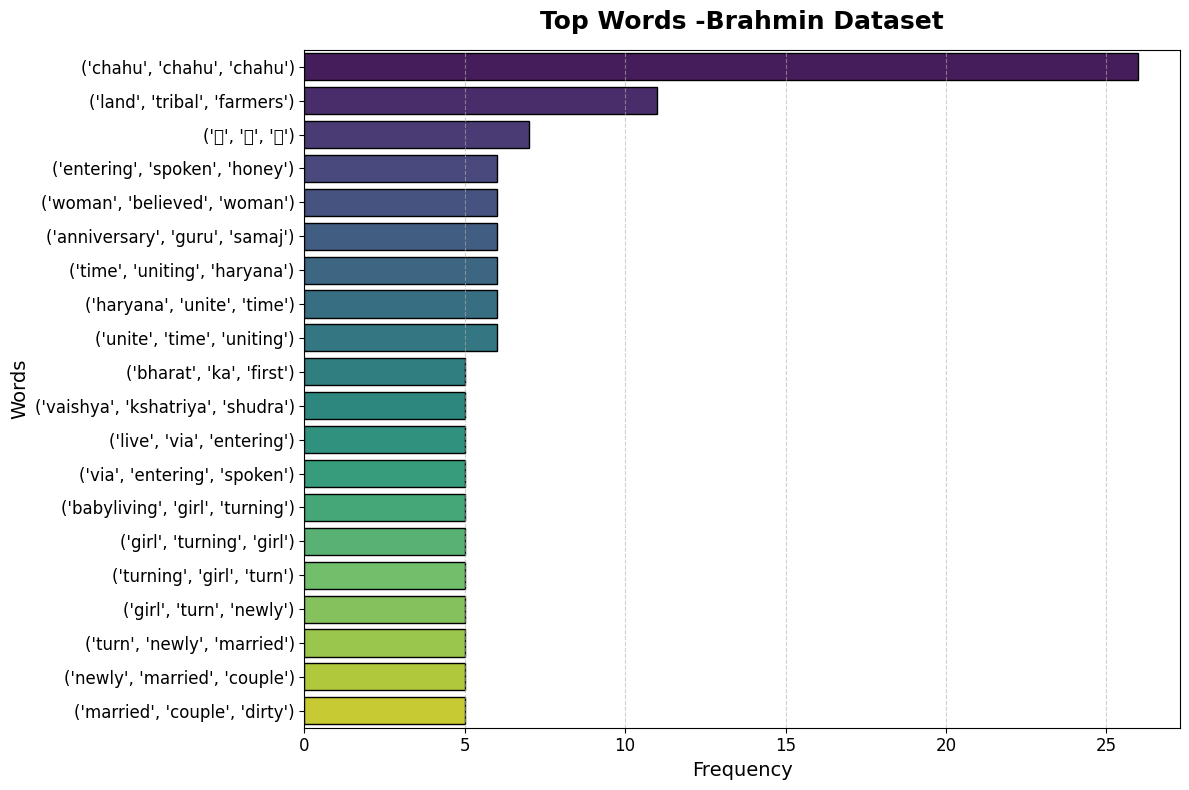

In [ ]:
import os
import re
import json
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import plotly.express as px


# Ensure you have the NLTK stopwords
nltk.download("stopwords")

# Set the folder path
folder_path = "/content/Cleaned"

# Load JSON files into a single dataframe
def load_datasets(folder_path):
    all_data = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".json"):
            with open(os.path.join(folder_path, file_name), "r", encoding="utf-8") as file:
                data = json.load(file)
                for tweet_id, text in data.items():
                    all_data.append({"source": file_name, "text": text})
    return pd.DataFrame(all_data)

# Preprocess text
def preprocess_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return tokens

# Frequency analysis
def frequency_analysis(texts, n=3, exclude_words=None):
    """
    Perform frequency analysis on a list of texts, generating n-grams and excluding stop words.
    :param texts: List of texts
    :param n: n-gram size (1 for unigrams, 2 for bigrams, 3 for trigrams, etc.)
    :param exclude_words: Additional custom words to exclude from analysis
    :return: Counter object with n-gram frequencies
    """
    # Combine NLTK's stop words with custom words
    stop_words = set(stopwords.words("english"))
    if exclude_words:
        stop_words.update(exclude_words)

    all_tokens = []
    for text in texts:
        # Tokenize and lowercase
        tokens = nltk.word_tokenize(text.lower())

        # Keep only alphanumeric tokens and exclude stop words
        tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
        all_tokens.extend(tokens)

    return Counter(nltk.ngrams(all_tokens, n))  # Generate n-grams


def filter_non_english_text(freq_dict):
    """Filter out keys with non-English characters in the frequency dictionary."""
    return {
        key: freq_dict[key]
        for key in freq_dict
        if re.match(r"^[a-zA-Z0-9\s]+$", " ".join(key))
    }
def clean_text_for_wordcloud(freq_dict):
    """Clean the frequency dictionary by removing unsupported characters."""
    cleaned_freq_dict = {}
    for key, value in freq_dict.items():
        # Remove any non-alphanumeric characters and normalize spaces
        cleaned_key = re.sub(r"[^a-zA-Z0-9\s]", "", " ".join(key))
        if cleaned_key.strip():  # Ensure the key is not empty after cleaning
            cleaned_freq_dict[cleaned_key] = value
    return cleaned_freq_dict


def generate_wordcloud(freq_dict, title):
    """Generate a word cloud with cleaned data."""
    # Clean the frequency dictionary
    cleaned_freq_dict = clean_text_for_wordcloud(freq_dict)

    # Path to a known good font
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf"  # Adjust if necessary

    try:
        # Generate word cloud
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color="white",
            font_path=font_path,
        ).generate_from_frequencies(cleaned_freq_dict)

        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(title, fontsize=16)
        plt.show()

    except ValueError as e:
        print(f"Word cloud generation failed: {e}. Check if the input text is clean and valid.")


# Generate bar chart
def generate_bar_chart(freq_dict, title, top_n=20):
    """Generate an enhanced bar chart for word frequencies."""
    most_common = freq_dict.most_common(top_n)
    words = [" ".join(ngram) for ngram, _ in most_common]
    counts = [count for _, count in most_common]

    # Create the plot
    plt.figure(figsize=(12, 8))
    plt.barh(words, counts, color="#4CAF50", edgecolor="black", alpha=0.8)
    plt.gca().invert_yaxis()  # Reverse order for better readability
    plt.xlabel("Frequency", fontsize=14, labelpad=10)
    plt.ylabel("Words", fontsize=14, labelpad=10)
    plt.title(title, fontsize=18, pad=15, fontweight="bold")
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig("bar_chart.png", dpi=300, bbox_inches="tight")
    plt.show()

def generate_seaborn_bar_chart(freq_dict, title, top_n=20):
    """Generate a beautiful bar chart using Seaborn."""
    most_common = freq_dict.most_common(top_n)
    df = pd.DataFrame(most_common, columns=["Words", "Frequency"])
    print(df.head())
    print(df.dtypes)
    df["Frequency"] = pd.to_numeric(df["Frequency"], errors="coerce")
    df["Words"] = df["Words"].astype(str)



    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, y="Words", x="Frequency", palette="viridis", edgecolor="black")
    plt.title(title, fontsize=18, pad=15, fontweight="bold")
    plt.xlabel("Frequency", fontsize=14)
    plt.ylabel("Words", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.savefig("word_cloud.png", dpi=300, bbox_inches="tight")
    plt.show()

def generate_interactive_bar_chart(freq_dict, title, top_n=20):
    """Generate an interactive bar chart using Plotly."""
    most_common = freq_dict.most_common(top_n)
    df = pd.DataFrame(most_common, columns=["Words", "Frequency"])  # Ensure correct columns

    fig = px.bar(
        df,
        x="Frequency",
        y="Words",
        orientation="h",
        title=title,
        color="Frequency",
        color_continuous_scale="Viridis",
    )
    fig.update_layout(
        title_font=dict(size=20, family="Arial", color="black"),
        xaxis_title="Frequency",
        yaxis_title="Words",
        template="plotly_white",
    )
    fig.show()

# Main function
def main():
    # Load datasets
    df = load_datasets(folder_path)

    # Separate by Dalit and Brahmin
    dalit_df = df[df["source"].str.contains("Dalit")]
    brahmin_df = df[df["source"].str.contains("Brahmin")]

    # Frequency analysis for combined dataset
    combined_freq = frequency_analysis(df["text"], exclude_words=["dalit", "dalits", "brahmin", "brahmins"])
    generate_wordcloud(combined_freq, "Word Cloud - Combined Dataset")
    generate_bar_chart(combined_freq, "Top Words - Combined Dataset")

    # Frequency analysis for Dalit
    dalit_freq = frequency_analysis(dalit_df["text"], exclude_words=["dalit", "dalits", "brahmin", "brahmins"])
    generate_wordcloud(dalit_freq, "Word Cloud - Dalit Dataset")
    generate_bar_chart(dalit_freq, "Top Words - Dalit Dataset")
    generate_seaborn_bar_chart(dalit_freq, "Top Words -Dalit Dataset")
    generate_interactive_bar_chart(dalit_freq, "Top Words -Dalit Dataset")

    # Frequency analysis for Brahmin
    brahmin_freq = frequency_analysis(brahmin_df["text"], exclude_words=["dalit", "dalits", "brahmin", "brahmins"])
    generate_wordcloud(brahmin_freq, "Word Cloud - Brahmin Dataset")
    generate_bar_chart(brahmin_freq, "Top Words - Brahmin Dataset")
    generate_seaborn_bar_chart(brahmin_freq, "Top Words -Brahmin Dataset")
    generate_interactive_bar_chart(brahmin_freq, "Top Words -Brahmin Dataset")

    # Optional: Save results to CSV
    combined_df = pd.DataFrame(combined_freq.items(), columns=["ngram", "frequency"])
    combined_df.to_csv("combined_frequency.csv", index=False)

if __name__ == "__main__":
    main()


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.4 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

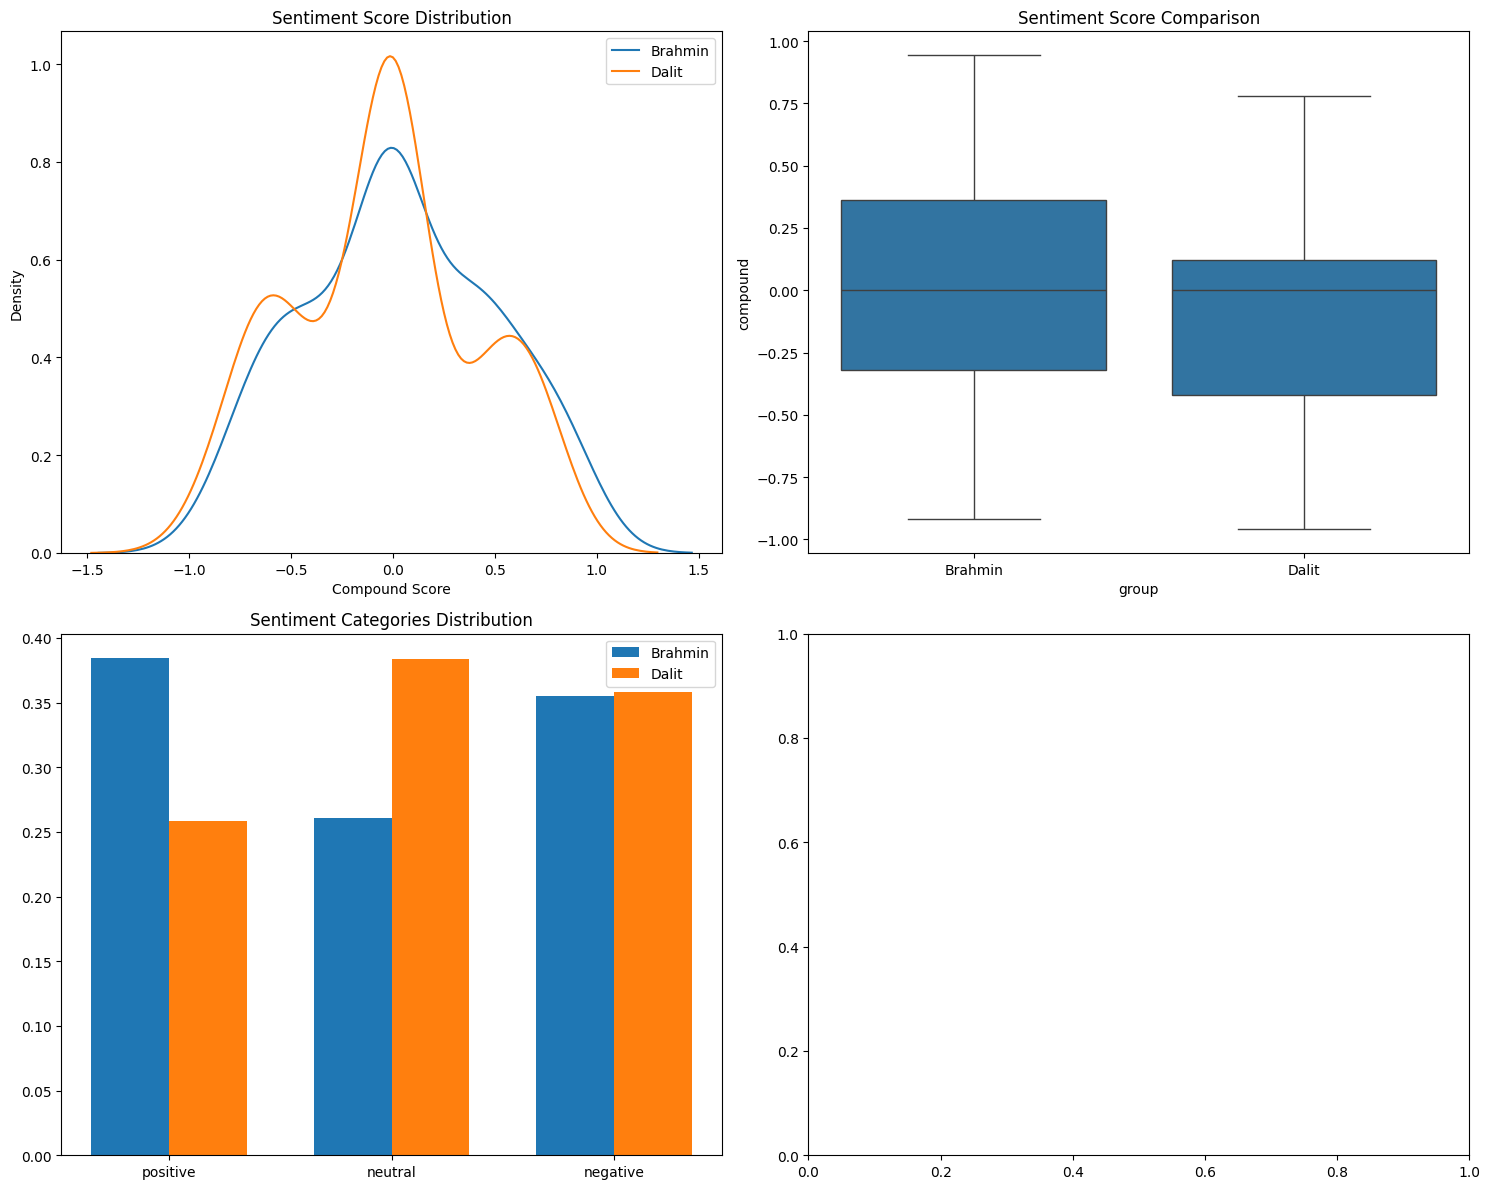


Brahmin Tweets Summary:
--------------------
Total tweets: 138
Mean sentiment: 0.033
Positive tweets: 38.4%
Negative tweets: 35.5%
Neutral tweets: 26.1%

Dalit Tweets Summary:
--------------------
Total tweets: 120
Mean sentiment: -0.048
Positive tweets: 25.8%
Negative tweets: 35.8%
Neutral tweets: 38.3%

Sample Brahmin Tweets with Sentiments:
----------------------------------------

Text: so pandemic 2 0 now the doland is president?
Sentiment score: 0.000
Category: neutral

Text: India me sabse zyada iq brahmins ka hi hai isi liye sab jagah dominate kar rahe hai brahmin ka average Iq aur apne community ka average Iq jaa kar compare kar compare
Sentiment score: -0.128
Category: negative

Text: Meaning you are not a Brahmin, only people like you flame India
Sentiment score: 0.361
Category: positive

Sample Dalit Tweets with Sentiments:
----------------------------------------

Text: How can Hindus be able to be a Dalit Brahmin brother
Sentiment score: 0.000
Category: neutral

Text: be

In [ ]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

class SentimentAnalyzer:
    def __init__(self):
        self.analyzer = SentimentIntensityAnalyzer()

    def load_data(self, brahmin_path, dalit_path):
        """Load data from JSON files"""
        # Load both datasets
        with open(brahmin_path, 'r', encoding='utf-8') as f:
            brahmin_data = json.load(f)
        with open(dalit_path, 'r', encoding='utf-8') as f:
            dalit_data = json.load(f)

        # Convert to DataFrames
        brahmin_df = pd.DataFrame({'text': brahmin_data.values()})
        dalit_df = pd.DataFrame({'text': dalit_data.values()})

        # Add group labels
        brahmin_df['group'] = 'Brahmin'
        dalit_df['group'] = 'Dalit'

        return brahmin_df, dalit_df

    def analyze_sentiment(self, text):
        """Get sentiment scores for a piece of text"""
        if pd.isna(text) or not isinstance(text, str):
            return {'compound': 0, 'pos': 0, 'neg': 0, 'neu': 0}
        return self.analyzer.polarity_scores(text)

    def analyze_dataset(self, df):
        """Analyze sentiment for entire dataset"""
        # Get sentiment scores
        sentiment_scores = df['text'].apply(self.analyze_sentiment)

        # Extract scores
        df['compound'] = sentiment_scores.apply(lambda x: x['compound'])
        df['positive'] = sentiment_scores.apply(lambda x: x['pos'])
        df['negative'] = sentiment_scores.apply(lambda x: x['neg'])
        df['neutral'] = sentiment_scores.apply(lambda x: x['neu'])

        # Add sentiment category
        df['sentiment'] = df['compound'].apply(
            lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral')
        )

        return df

    def plot_results(self, brahmin_df, dalit_df):
        """Create visualizations comparing the two groups"""
        # Create subplot figure
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # 1. Distribution Plot
        sns.kdeplot(data=brahmin_df['compound'], label='Brahmin', ax=axes[0,0])
        sns.kdeplot(data=dalit_df['compound'], label='Dalit', ax=axes[0,0])
        axes[0,0].set_title('Sentiment Score Distribution')
        axes[0,0].set_xlabel('Compound Score')
        axes[0,0].legend()

        # 2. Box Plot
        combined_df = pd.concat([
            brahmin_df[['compound', 'group']],
            dalit_df[['compound', 'group']]
        ])
        sns.boxplot(data=combined_df, x='group', y='compound', ax=axes[0,1])
        axes[0,1].set_title('Sentiment Score Comparison')

        # 3. Sentiment Categories
        categories = ['positive', 'neutral', 'negative']
        brahmin_cats = [
            (brahmin_df['sentiment'] == cat).mean() for cat in categories
        ]
        dalit_cats = [
            (dalit_df['sentiment'] == cat).mean() for cat in categories
        ]

        x = np.arange(len(categories))
        width = 0.35

        axes[1,0].bar(x - width/2, brahmin_cats, width, label='Brahmin')
        axes[1,0].bar(x + width/2, dalit_cats, width, label='Dalit')
        axes[1,0].set_xticks(x)
        axes[1,0].set_xticklabels(categories)
        axes[1,0].set_title('Sentiment Categories Distribution')
        axes[1,0].legend()

        plt.tight_layout()
        plt.show()

        # Print summary statistics
        print("\nBrahmin Tweets Summary:")
        print("-" * 20)
        print(f"Total tweets: {len(brahmin_df)}")
        print(f"Mean sentiment: {brahmin_df['compound'].mean():.3f}")
        print(f"Positive tweets: {(brahmin_df['sentiment'] == 'positive').mean():.1%}")
        print(f"Negative tweets: {(brahmin_df['sentiment'] == 'negative').mean():.1%}")
        print(f"Neutral tweets: {(brahmin_df['sentiment'] == 'neutral').mean():.1%}")

        print("\nDalit Tweets Summary:")
        print("-" * 20)
        print(f"Total tweets: {len(dalit_df)}")
        print(f"Mean sentiment: {dalit_df['compound'].mean():.3f}")
        print(f"Positive tweets: {(dalit_df['sentiment'] == 'positive').mean():.1%}")
        print(f"Negative tweets: {(dalit_df['sentiment'] == 'negative').mean():.1%}")
        print(f"Neutral tweets: {(dalit_df['sentiment'] == 'neutral').mean():.1%}")

def main():
    analyzer = SentimentAnalyzer()

    # Load data
    brahmin_df, dalit_df = analyzer.load_data(
        'tweets_Brahmin_en_cleaned.json',
        'tweets_Dalit_en_cleaned.json'
    )

    # Analyze sentiment
    brahmin_analyzed = analyzer.analyze_dataset(brahmin_df)
    dalit_analyzed = analyzer.analyze_dataset(dalit_df)

    # Plot results
    analyzer.plot_results(brahmin_analyzed, dalit_analyzed)

    # Print sample tweets with sentiments
    print("\nSample Brahmin Tweets with Sentiments:")
    print("-" * 40)
    for _, row in brahmin_analyzed.sample(3).iterrows():
        print(f"\nText: {row['text']}")
        print(f"Sentiment score: {row['compound']:.3f}")
        print(f"Category: {row['sentiment']}")

    print("\nSample Dalit Tweets with Sentiments:")
    print("-" * 40)
    for _, row in dalit_analyzed.sample(3).iterrows():
        print(f"\nText: {row['text']}")
        print(f"Sentiment score: {row['compound']:.3f}")
        print(f"Category: {row['sentiment']}")

    return brahmin_analyzed, dalit_analyzed

if __name__ == "__main__":
    brahmin_analyzed, dalit_analyzed = main()


Statistical Analysis:
--------------------------------------------------
Mann-Whitney U test p-value: 0.2312
Effect size (Cohen's d): 0.1756


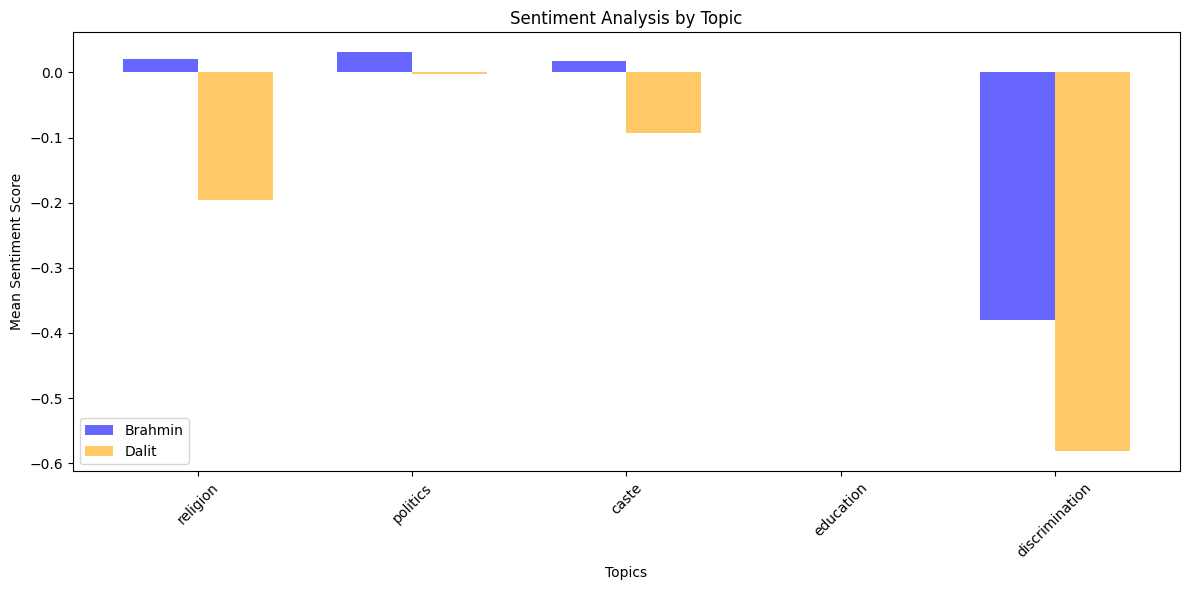


Topic Analysis:
--------------------------------------------------

Topic: religion
Brahmin tweets: 18 tweets, Mean sentiment: 0.020, Positive ratio: 44.4%
Dalit tweets: 17 tweets, Mean sentiment: -0.196, Positive ratio: 29.4%

Topic: politics
Brahmin tweets: 10 tweets, Mean sentiment: 0.031, Positive ratio: 20.0%
Dalit tweets: 23 tweets, Mean sentiment: -0.002, Positive ratio: 43.5%

Topic: caste
Brahmin tweets: 77 tweets, Mean sentiment: 0.017, Positive ratio: 40.3%
Dalit tweets: 76 tweets, Mean sentiment: -0.092, Positive ratio: 25.0%

Topic: education
Brahmin tweets: 0 tweets, Mean sentiment: 0.000, Positive ratio: 0.0%
Dalit tweets: 1 tweets, Mean sentiment: 0.000, Positive ratio: 0.0%

Topic: discrimination
Brahmin tweets: 5 tweets, Mean sentiment: -0.379, Positive ratio: 20.0%
Dalit tweets: 3 tweets, Mean sentiment: -0.582, Positive ratio: 0.0%


In [ ]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from collections import Counter

class EnhancedSentimentAnalyzer:
    def __init__(self, brahmin_df, dalit_df):
        self.brahmin_df = brahmin_df
        self.dalit_df = dalit_df

    def perform_statistical_tests(self):
        """Perform statistical significance tests"""
        # Mann-Whitney U test
        statistic, pvalue = stats.mannwhitneyu(
            self.brahmin_df['compound'],
            self.dalit_df['compound'],
            alternative='two-sided'
        )

        # Effect size (Cohen's d)
        cohens_d = (self.brahmin_df['compound'].mean() - self.dalit_df['compound'].mean()) / np.sqrt(
            (self.brahmin_df['compound'].var() + self.dalit_df['compound'].var()) / 2
        )

        return {
            'statistic': statistic,
            'p_value': pvalue,
            'cohens_d': cohens_d
        }

    def extract_common_topics(self, text):
        """Extract common topics from text"""
        # Define topics of interest
        topics = {
            'religion': r'\b(hindu|muslim|religion|temple|mosque|god|worship)\b',
            'politics': r'\b(bjp|congress|politics|government|election|vote)\b',
            'caste': r'\b(caste|brahmin|dalit|reservation|sc|st|obc)\b',
            'education': r'\b(education|school|college|university|student)\b',
            'discrimination': r'\b(discrimination|bias|prejudice|hate|oppression)\b'
        }

        found_topics = []
        for topic, pattern in topics.items():
            if re.search(pattern, text.lower()):
                found_topics.append(topic)
        return found_topics

    def analyze_topic_sentiment(self):
        """Analyze sentiment by topic"""
        # Add topics to dataframes
        self.brahmin_df['topics'] = self.brahmin_df['text'].apply(self.extract_common_topics)
        self.dalit_df['topics'] = self.dalit_df['text'].apply(self.extract_common_topics)

        # Analyze sentiment by topic
        topic_sentiments = {'brahmin': {}, 'dalit': {}}

        for topic in ['religion', 'politics', 'caste', 'education', 'discrimination']:
            # Brahmin tweets
            brahmin_topic = self.brahmin_df[self.brahmin_df['topics'].apply(lambda x: topic in x)]
            topic_sentiments['brahmin'][topic] = {
                'count': len(brahmin_topic),
                'mean_sentiment': brahmin_topic['compound'].mean() if len(brahmin_topic) > 0 else 0,
                'positive_ratio': (brahmin_topic['sentiment'] == 'positive').mean() if len(brahmin_topic) > 0 else 0
            }

            # Dalit tweets
            dalit_topic = self.dalit_df[self.dalit_df['topics'].apply(lambda x: topic in x)]
            topic_sentiments['dalit'][topic] = {
                'count': len(dalit_topic),
                'mean_sentiment': dalit_topic['compound'].mean() if len(dalit_topic) > 0 else 0,
                'positive_ratio': (dalit_topic['sentiment'] == 'positive').mean() if len(dalit_topic) > 0 else 0
            }

        return topic_sentiments

    def plot_topic_analysis(self, topic_sentiments):
        """Create visualization for topic analysis"""
        topics = list(topic_sentiments['brahmin'].keys())
        brahmin_means = [topic_sentiments['brahmin'][t]['mean_sentiment'] for t in topics]
        dalit_means = [topic_sentiments['dalit'][t]['mean_sentiment'] for t in topics]

        plt.figure(figsize=(12, 6))
        x = np.arange(len(topics))
        width = 0.35

        plt.bar(x - width/2, brahmin_means, width, label='Brahmin', color='blue', alpha=0.6)
        plt.bar(x + width/2, dalit_means, width, label='Dalit', color='orange', alpha=0.6)

        plt.xlabel('Topics')
        plt.ylabel('Mean Sentiment Score')
        plt.title('Sentiment Analysis by Topic')
        plt.xticks(x, topics, rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Print detailed topic statistics
        print("\nTopic Analysis:")
        print("-" * 50)
        for topic in topics:
            print(f"\nTopic: {topic}")
            print(f"Brahmin tweets: {topic_sentiments['brahmin'][topic]['count']} tweets, "
                  f"Mean sentiment: {topic_sentiments['brahmin'][topic]['mean_sentiment']:.3f}, "
                  f"Positive ratio: {topic_sentiments['brahmin'][topic]['positive_ratio']:.1%}")
            print(f"Dalit tweets: {topic_sentiments['dalit'][topic]['count']} tweets, "
                  f"Mean sentiment: {topic_sentiments['dalit'][topic]['mean_sentiment']:.3f}, "
                  f"Positive ratio: {topic_sentiments['dalit'][topic]['positive_ratio']:.1%}")

def main():
    # Load your existing analyzed dataframes here
    analyzer = EnhancedSentimentAnalyzer(brahmin_analyzed, dalit_analyzed)

    # Perform statistical tests
    stats_results = analyzer.perform_statistical_tests()
    print("\nStatistical Analysis:")
    print("-" * 50)
    print(f"Mann-Whitney U test p-value: {stats_results['p_value']:.4f}")
    print(f"Effect size (Cohen's d): {stats_results['cohens_d']:.4f}")

    # Analyze topics
    topic_sentiments = analyzer.analyze_topic_sentiment()
    analyzer.plot_topic_analysis(topic_sentiments)

if __name__ == "__main__":
    main()

Processing English...
Processing Hindi...
Processing Gujarati...
Processing Marathi...
Processing Punjabi...
Processing Bengali...


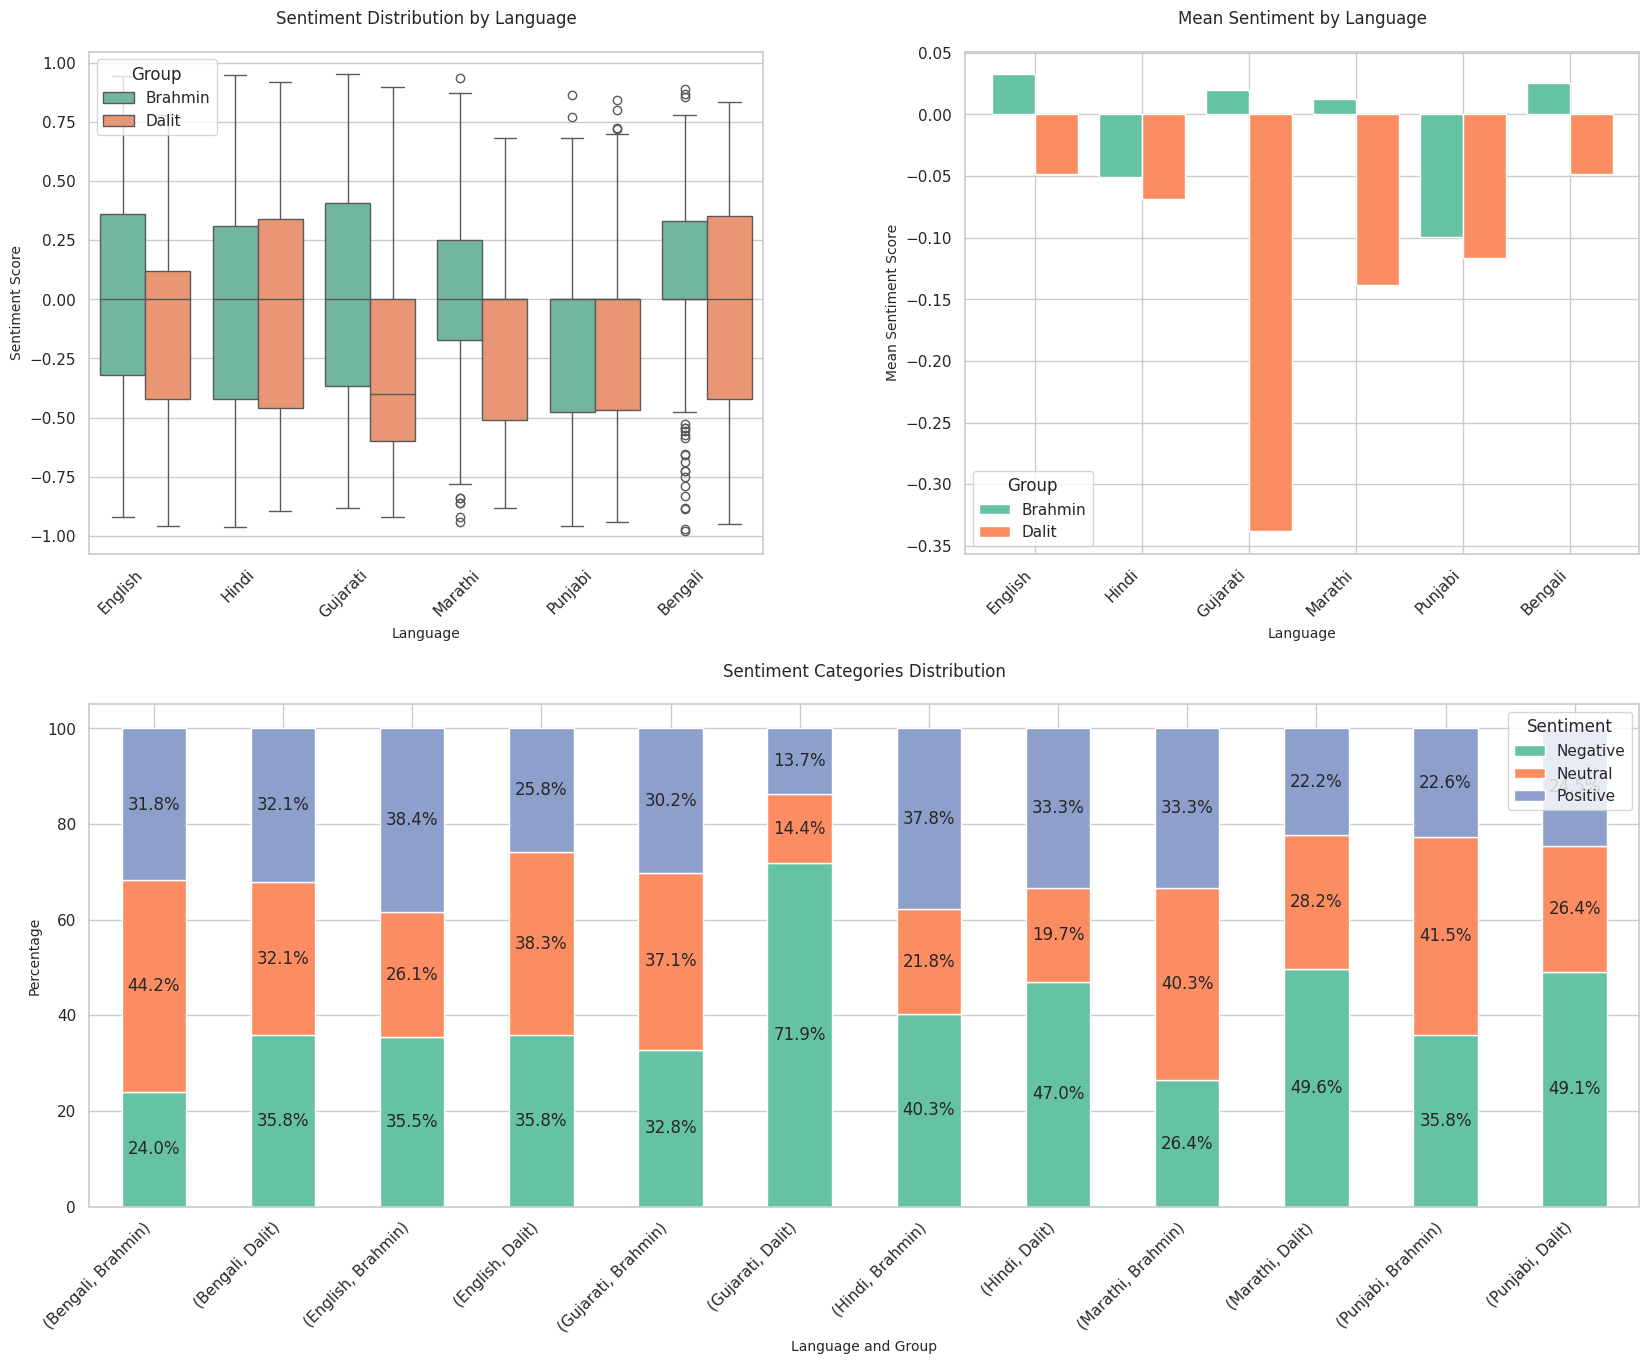

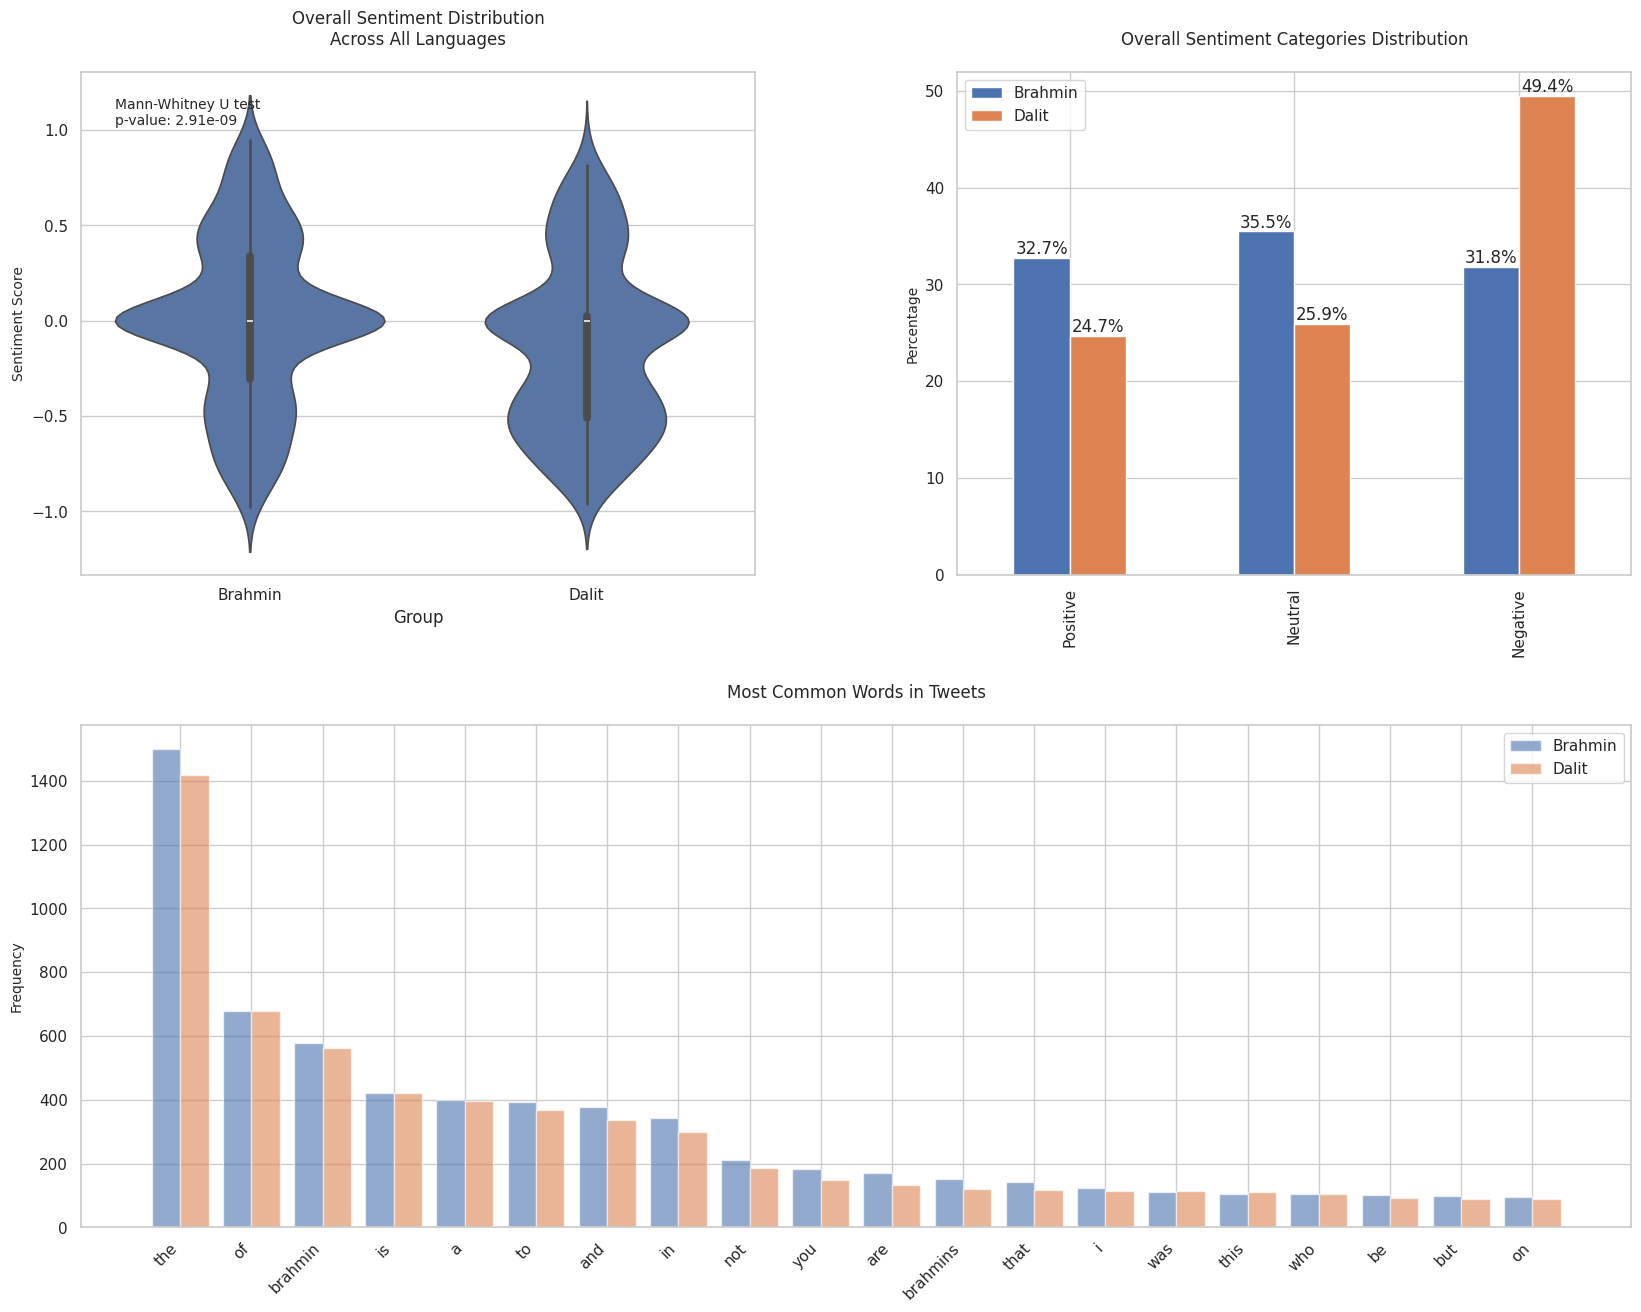


Summary Statistics:

English:
------------------------------
Brahmin Tweets (138):
Mean sentiment: 0.033
Positive: 38.4%
Negative: 35.5%

Dalit Tweets (120):
Mean sentiment: -0.048
Positive: 25.8%
Negative: 35.8%

Hindi:
------------------------------
Brahmin Tweets (119):
Mean sentiment: -0.051
Positive: 37.8%
Negative: 40.3%

Dalit Tweets (117):
Mean sentiment: -0.068
Positive: 33.3%
Negative: 47.0%

Gujarati:
------------------------------
Brahmin Tweets (116):
Mean sentiment: 0.020
Positive: 30.2%
Negative: 32.8%

Dalit Tweets (153):
Mean sentiment: -0.338
Positive: 13.7%
Negative: 71.9%

Marathi:
------------------------------
Brahmin Tweets (159):
Mean sentiment: 0.013
Positive: 33.3%
Negative: 26.4%

Dalit Tweets (117):
Mean sentiment: -0.139
Positive: 22.2%
Negative: 49.6%

Punjabi:
------------------------------
Brahmin Tweets (106):
Mean sentiment: -0.100
Positive: 22.6%
Negative: 35.8%

Dalit Tweets (106):
Mean sentiment: -0.116
Positive: 24.5%
Negative: 49.1%

Bengali:
---

In [ ]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import json
from typing import Dict, List
import warnings
warnings.filterwarnings('ignore')

class MultilingualSentimentAnalyzer:


    def plot_combined_analysis(self):
        """Create visualizations for combined sentiment analysis across all languages"""
        sns.set_theme(style="whitegrid")

        # Create figure with subplots
        fig = plt.figure(figsize=(20, 15))
        gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

        # 1. Overall Distribution (Violin Plot)
        ax1 = fig.add_subplot(gs[0, 0])
        combined_data = pd.concat([
            pd.DataFrame({
                'Sentiment': self.combined_brahmin['compound'],
                'Group': 'Brahmin'
            }),
            pd.DataFrame({
                'Sentiment': self.combined_dalit['compound'],
                'Group': 'Dalit'
            })
        ])

        sns.violinplot(data=combined_data, x='Group', y='Sentiment', ax=ax1)
        ax1.set_title('Overall Sentiment Distribution\nAcross All Languages', pad=20, fontsize=12)
        ax1.set_ylabel('Sentiment Score', fontsize=10)

        # Add statistical test results
        stat, pval = stats.mannwhitneyu(
            self.combined_brahmin['compound'],
            self.combined_dalit['compound']
        )
        ax1.text(0.05, 0.95, f'Mann-Whitney U test\np-value: {pval:.2e}',
                transform=ax1.transAxes, fontsize=10,
                verticalalignment='top')

        # 2. Sentiment Category Proportions
        ax2 = fig.add_subplot(gs[0, 1])
        combined_categories = pd.DataFrame({
            'Brahmin': [
                (self.combined_brahmin['sentiment'] == cat).mean() * 100
                for cat in ['positive', 'neutral', 'negative']
            ],
            'Dalit': [
                (self.combined_dalit['sentiment'] == cat).mean() * 100
                for cat in ['positive', 'neutral', 'negative']
            ]
        }, index=['Positive', 'Neutral', 'Negative'])

        combined_categories.plot(kind='bar', ax=ax2)
        ax2.set_title('Overall Sentiment Categories Distribution', pad=20, fontsize=12)
        ax2.set_ylabel('Percentage', fontsize=10)
        for container in ax2.containers:
            ax2.bar_label(container, fmt='%.1f%%')

        # 3. Time Series Analysis (if timestamp data is available)
        ax3 = fig.add_subplot(gs[1, :])
        if 'timestamp' in self.combined_brahmin.columns:
            # Convert timestamp to datetime if it's not already
            self.combined_brahmin['timestamp'] = pd.to_datetime(self.combined_brahmin['timestamp'])
            self.combined_dalit['timestamp'] = pd.to_datetime(self.combined_dalit['timestamp'])

            # Resample by day and calculate mean sentiment
            brahmin_ts = self.combined_brahmin.set_index('timestamp')['compound'].resample('D').mean()
            dalit_ts = self.combined_dalit.set_index('timestamp')['compound'].resample('D').mean()

            # Plot time series
            brahmin_ts.plot(ax=ax3, label='Brahmin')
            dalit_ts.plot(ax=ax3, label='Dalit')
            ax3.set_title('Sentiment Trends Over Time', pad=20, fontsize=12)
            ax3.set_ylabel('Mean Sentiment Score', fontsize=10)
            ax3.set_xlabel('Date', fontsize=10)
            ax3.legend()
        else:
            # If no timestamp data, show word frequencies instead
            from collections import Counter
            import re

            def get_word_frequencies(texts, top_n=20):
                words = ' '.join(texts).lower()
                words = re.findall(r'\b\w+\b', words)
                return Counter(words).most_common(top_n)

            brahmin_freq = get_word_frequencies(self.combined_brahmin['text'])
            dalit_freq = get_word_frequencies(self.combined_dalit['text'])

            # Plot word frequencies
            x_brahmin = range(len(brahmin_freq))
            x_dalit = range(len(dalit_freq))

            ax3.bar([x - 0.2 for x in x_brahmin], [f[1] for f in brahmin_freq],
                    0.4, label='Brahmin', alpha=0.6)
            ax3.bar([x + 0.2 for x in x_dalit], [f[1] for f in dalit_freq],
                    0.4, label='Dalit', alpha=0.6)

            ax3.set_xticks(range(len(brahmin_freq)))
            ax3.set_xticklabels([f[0] for f in brahmin_freq], rotation=45, ha='right')
            ax3.set_title('Most Common Words in Tweets', pad=20, fontsize=12)
            ax3.set_ylabel('Frequency', fontsize=10)
            ax3.legend()

        plt.tight_layout()
        plt.show()

    def print_combined_statistics(self):
        """Print combined statistics across all languages"""
        print("\nCombined Statistics Across All Languages:")
        print("=" * 50)

        # Basic statistics
        print("\nNumber of tweets analyzed:")
        print(f"Brahmin: {len(self.combined_brahmin):,}")
        print(f"Dalit: {len(self.combined_dalit):,}")

        # Sentiment statistics
        print("\nOverall sentiment scores:")
        print("\nBrahmin tweets:")
        print(f"Mean sentiment: {self.combined_brahmin['compound'].mean():.3f}")
        print(f"Median sentiment: {self.combined_brahmin['compound'].median():.3f}")
        print(f"Std deviation: {self.combined_brahmin['compound'].std():.3f}")

        print("\nDalit tweets:")
        print(f"Mean sentiment: {self.combined_dalit['compound'].mean():.3f}")
        print(f"Median sentiment: {self.combined_dalit['compound'].median():.3f}")
        print(f"Std deviation: {self.combined_dalit['compound'].std():.3f}")

        # Sentiment categories
        print("\nSentiment categories distribution:")
        print("\nBrahmin tweets:")
        for category in ['positive', 'neutral', 'negative']:
            pct = (self.combined_brahmin['sentiment'] == category).mean() * 100
            print(f"{category.capitalize()}: {pct:.1f}%")

        print("\nDalit tweets:")
        for category in ['positive', 'neutral', 'negative']:
            pct = (self.combined_dalit['sentiment'] == category).mean() * 100
            print(f"{category.capitalize()}: {pct:.1f}%")

        # Statistical tests
        stat, pval = stats.mannwhitneyu(
            self.combined_brahmin['compound'],
            self.combined_dalit['compound']
        )
        print("\nStatistical Analysis:")
        print(f"Mann-Whitney U test p-value: {pval:.2e}")
        print("(Tests whether the two groups have significantly different distributions)")

    def __init__(self):
        self.analyzer = SentimentIntensityAnalyzer()
        self.languages = ['en', 'hi', 'gu', 'mr', 'pa', 'bn']
        self.language_names = {
            'en': 'English',
            'hi': 'Hindi',
            'gu': 'Gujarati',
            'mr': 'Marathi',
            'pa': 'Punjabi',
            'bn': 'Bengali'
        }
        self.results = {}

    def load_language_data(self, lang_code: str) -> tuple:
        """Load data for a specific language"""
        try:
            # Load Brahmin tweets
            with open(f'tweets_Brahmin_{lang_code}_cleaned.json', 'r', encoding='utf-8') as f:
                brahmin_data = json.load(f)

            # Load Dalit tweets
            with open(f'tweets_Dalit_{lang_code}_cleaned.json', 'r', encoding='utf-8') as f:
                dalit_data = json.load(f)

            # Convert to DataFrames
            brahmin_df = pd.DataFrame({'text': brahmin_data.values()})
            dalit_df = pd.DataFrame({'text': dalit_data.values()})

            # Add metadata
            brahmin_df['group'] = 'Brahmin'
            brahmin_df['language'] = lang_code
            dalit_df['group'] = 'Dalit'
            dalit_df['language'] = lang_code

            return brahmin_df, dalit_df

        except Exception as e:
            print(f"Error loading {lang_code} data: {str(e)}")
            return None, None

    def analyze_sentiment(self, df: pd.DataFrame) -> pd.DataFrame:
        """Analyze sentiment for a dataframe"""
        # Get sentiment scores
        df['scores'] = df['text'].apply(lambda x: self.analyzer.polarity_scores(str(x)))
        df['compound'] = df['scores'].apply(lambda x: x['compound'])
        df['sentiment'] = df['compound'].apply(
            lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral')
        )
        return df

    def analyze_all_languages(self) -> Dict:
        """Analyze sentiment for all languages"""
        all_brahmin_dfs = []
        all_dalit_dfs = []

        for lang in self.languages:
            print(f"Processing {self.language_names[lang]}...")
            brahmin_df, dalit_df = self.load_language_data(lang)

            if brahmin_df is not None and dalit_df is not None:
                # Analyze sentiment
                brahmin_analyzed = self.analyze_sentiment(brahmin_df)
                dalit_analyzed = self.analyze_sentiment(dalit_df)

                # Store results
                self.results[lang] = {
                    'brahmin': brahmin_analyzed,
                    'dalit': dalit_analyzed
                }

                # Add to combined dataframes
                all_brahmin_dfs.append(brahmin_analyzed)
                all_dalit_dfs.append(dalit_analyzed)

        # Create combined dataframes
        self.combined_brahmin = pd.concat(all_brahmin_dfs, ignore_index=True)
        self.combined_dalit = pd.concat(all_dalit_dfs, ignore_index=True)

        return self.results

    def plot_language_comparison(self):
        """Create improved visualizations comparing sentiments across languages"""
        # Set up the plot style using seaborn
        sns.set_theme(style="whitegrid")  # Set seaborn style
        sns.set_palette("Set2")  # Set color palette

        # Create figure with adjusted size and spacing
        fig = plt.figure(figsize=(20, 15))
        gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

        # 1. Overall sentiment distribution by language
        ax1 = fig.add_subplot(gs[0, 0])

        # Prepare data for boxplot
        data = []
        for lang in self.languages:
            if lang in self.results:
                data.extend([
                    {'Language': self.language_names[lang], 'Group': 'Brahmin',
                    'Sentiment': row['compound']}
                    for _, row in self.results[lang]['brahmin'].iterrows()
                ])
                data.extend([
                    {'Language': self.language_names[lang], 'Group': 'Dalit',
                    'Sentiment': row['compound']}
                    for _, row in self.results[lang]['dalit'].iterrows()
                ])

        df_plot = pd.DataFrame(data)

        # Create enhanced boxplot
        sns.boxplot(data=df_plot, x='Language', y='Sentiment', hue='Group', ax=ax1)
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
        ax1.set_title('Sentiment Distribution by Language', pad=20, fontsize=12)
        ax1.set_ylabel('Sentiment Score', fontsize=10)
        ax1.set_xlabel('Language', fontsize=10)

        # 2. Mean sentiment comparison
        ax2 = fig.add_subplot(gs[0, 1])
        means_data = []
        for lang in self.languages:
            if lang in self.results:
                means_data.append({
                    'Language': self.language_names[lang],
                    'Brahmin': self.results[lang]['brahmin']['compound'].mean(),
                    'Dalit': self.results[lang]['dalit']['compound'].mean()
                })

        df_means = pd.DataFrame(means_data)

        # Create enhanced bar plot
        df_means.plot(x='Language', kind='bar', ax=ax2, width=0.8)
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
        ax2.set_title('Mean Sentiment by Language', pad=20, fontsize=12)
        ax2.set_ylabel('Mean Sentiment Score', fontsize=10)
        ax2.set_xlabel('Language', fontsize=10)
        ax2.legend(title='Group')

        # 3. Sentiment categories distribution
        ax3 = fig.add_subplot(gs[1, :])
        categories_data = []
        for lang in self.languages:
            if lang in self.results:
                for group in ['brahmin', 'dalit']:
                    df = self.results[lang][group]
                    for category in ['positive', 'neutral', 'negative']:
                        ratio = (df['sentiment'] == category).mean()
                        categories_data.append({
                            'Language': self.language_names[lang],
                            'Group': group.capitalize(),
                            'Category': category.capitalize(),
                            'Ratio': ratio * 100  # Convert to percentage
                        })

        df_cats = pd.DataFrame(categories_data)

        # Create enhanced stacked bar plot
        df_cats_pivot = df_cats.pivot_table(
            values='Ratio',
            index=['Language', 'Group'],
            columns='Category'
        )

        df_cats_pivot.plot(kind='bar', stacked=True, ax=ax3)
        ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
        ax3.set_title('Sentiment Categories Distribution', pad=20, fontsize=12)
        ax3.set_ylabel('Percentage', fontsize=10)
        ax3.set_xlabel('Language and Group', fontsize=10)
        ax3.legend(title='Sentiment')

        # Add percentage labels on the stacked bars
        for c in ax3.containers:
            ax3.bar_label(c, fmt='%.1f%%', label_type='center')

        # Adjust layout
        plt.tight_layout()
        plt.show()

    def print_summary_statistics(self):
        """Print summary statistics for all languages"""
        print("\nSummary Statistics:")
        print("=" * 50)

        for lang in self.languages:
            if lang in self.results:
                print(f"\n{self.language_names[lang]}:")
                print("-" * 30)

                # Brahmin statistics
                brahmin_df = self.results[lang]['brahmin']
                print(f"Brahmin Tweets ({len(brahmin_df)}):")
                print(f"Mean sentiment: {brahmin_df['compound'].mean():.3f}")
                print(f"Positive: {(brahmin_df['sentiment'] == 'positive').mean():.1%}")
                print(f"Negative: {(brahmin_df['sentiment'] == 'negative').mean():.1%}")

                # Dalit statistics
                dalit_df = self.results[lang]['dalit']
                print(f"\nDalit Tweets ({len(dalit_df)}):")
                print(f"Mean sentiment: {dalit_df['compound'].mean():.3f}")
                print(f"Positive: {(dalit_df['sentiment'] == 'positive').mean():.1%}")
                print(f"Negative: {(dalit_df['sentiment'] == 'negative').mean():.1%}")

def main():
    # Initialize analyzer
    analyzer = MultilingualSentimentAnalyzer()

    # Analyze all languages
    results = analyzer.analyze_all_languages()

    # Create language-specific visualizations
    analyzer.plot_language_comparison()

    # Create combined analysis visualizations
    analyzer.plot_combined_analysis()

    # Print statistics
    analyzer.print_summary_statistics()
    analyzer.print_combined_statistics()

if __name__ == "__main__":
    main()

NameError: name 'results' is not defined